# Make Logistic Regression Data

This notebook creates sample data to be used in training a binary classifier.

I'll create the data by using a Gaussian mixture model, meaning
that I'll have two different mean points in $\mathbb R^3$, each of which is the
center of a normal distribution. Points in one of these clusters will all
receive the label 0, while points in the other receive label 1.

In [41]:
# Imports

%matplotlib inline

import pickle

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model               import LogisticRegression
from sklearn.model_selection            import train_test_split

Note: I learned of the handy `make_blobs()` function from [this post on Gaussian mixture models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html).

In [25]:
X, y = make_blobs(
    n_samples = 500,
    centers = 2,
    random_state = 4
)
X.shape, y.shape

((500, 2), (500,))

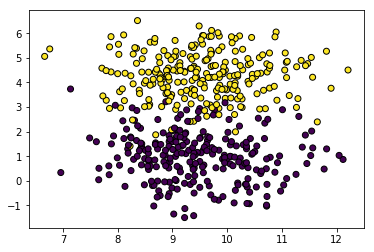

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.show()

I think this is a good data set to work with because
it's not entirely linearly separable, although as a
human I can look at it and easily have a sense of
what a good decision boundary will be.

## Split and save the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
with open('binary_clf_data.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

## Discover good learned weights for this data

The purpose of this is to have a way to evaluate performance of the
tensorflow implementation of logistic regression.

In [34]:
# A high value of C here will effectively turn off regularization,
# which will allow us to fairly compare against a non-regularized
# tensorflow implementation.
lr_model = LogisticRegression(C=1e5).fit(X_train, y_train)

In [39]:
# What is our test accuracy?
sum(lr_model.predict(X_test) == y_test) / len(y_test)

0.95

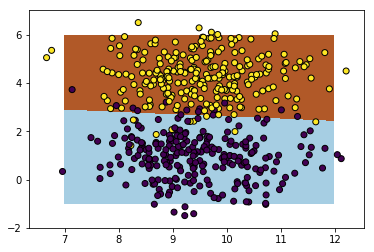

In [46]:
# What does the decision boundary look like?

h = 0.02  # This is the mesh step size.
xx, yy = np.meshgrid(np.arange(7, 12, h), np.arange(-1, 6, h))
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.show()

That looks good to me.

In [49]:
# What weights have we learned?

print('Coefficients:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)

Coefficients: [[0.35163452 3.70379774]]
Intercept: [-13.27250277]


## References

* [The `LogisticRegression` class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Decision boundary coloring example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)
* [train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [make_blobs()](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

See also: [Interesting post on Gaussian mixture models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)